# 분류 성능 평가

## Scikit-Learn 에서 지원하는 분류 성능 평가 명령

* `sklearn.metrics` 서브 패키지
 * `confusion_matrix()`
 * `classfication_report()`
 * `accuracy_score(y_true, y_pred)`
 * `precision_score(y_true, y_pred)`
 * `recall_score(y_true, y_pred)`
 * `fbeta_score(y_true, y_pred, beta)`
 * `f1_score(y_true, y_pred)`


## 분류 결과표 Confusion Matrix

| | 예측 클래스 0 | 예측 클래스 1 | 예측 클래스 2 | 
|-|-|-|-|
| 원 클래스 0 | <small>원 클래스가 0, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 0, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 0, 예측 클래스가 2인 표본의 수</small> |
| 원 클래스 1 | <small>원 클래스가 1, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 1, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 1, 예측 클래스가 2인 표본의 수</small> |
| 원 클래스 2 | <small>원 클래스가 2, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 2, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 2, 예측 클래스가 2인 표본의 수</small> |


In [1]:
from sklearn.metrics import confusion_matrix

In [2]:
y_true = [7, 0, 0, 7, 0, 6]
y_pred = [0, 0, 7, 7, 0, 7]
confusion_matrix(y_true, y_pred)

array([[2, 0, 1],
       [0, 0, 1],
       [1, 0, 1]])

## 이진 분류 결과표 Binary Confusion Matrix

| | Positive라고 예측  | Negative라고 예측 | 
|-|-|-|
| 실제 Positive | TP   |  FN |             
| 실제 Negative | FP   |  TN |  

### Accuracy 정확도
* 전체 샘플 중 맞게 예측한 샘플 수의 비율
* 모형 트레이닝 즉 최적화에서 목적함수로 사용  
 
 $$\text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN}$$
 
### Precision 정밀도
* 클래스에 속한다고 출력한 샘플 중 실제로 클래스에 속하는 샘플 수의 비율
* FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율. 유죄율
* 죄인이라고 예측한 사람들을 가지고 검사한다. 일단 법정에 선 거다.
* FP(죄인이 아닌데 죄인으로 법정에 선 사람)을 줄이면 올라간다. 즉 죄인을 고를때 확실하게 죄인만 잡으면 올라간다.

$$\text{precision} = \dfrac{TP}{TP + FP}$$

### Recall 재현율
* 실제 클래스에 속한 샘플 중에 클래스에 속한다고 출력한 샘플의 수
* FDS의 경우, 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율. 검거율
* TPR(true positive rate)
* sensitivity(민감도)
* 진짜 범인들을 가지고 검사한다. 
* FN(진짜 죄인인데 풀어준사람)을 줄이면 올라간다. 즉 다 죄인이라고 판결하면 올라간다.  
 
$$\text{recall} = \dfrac{TP}{TP + FN}$$

### Fall-Out 위양성율
* 실제 클래스에 속하지 않는 샘플 중에 클래스에 속한다고 출력한 샘플의 수
* FDS의 경우, 실제 정상 거래 중에서 FDS가 사기 거래라고 예측한 거래의 비율, 원죄(寃罪)율
* FPR(alse positive rate)
* specificity(특이도) = 1 - fall-out

$$\text{fallout} = \dfrac{FP}{FP + TN}$$

### F (beta) score
* 정밀도(Precision)과 재현율(Recall)의 가중 조화 평균
 
$$
F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})
$$


* F1 score
 * beta = 1 

$$
F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})
$$

In [3]:
from sklearn.metrics import *
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



## ROC 커브ROC(Receiver Operator Characteristic)

클래스 판별 기준값의 변화에 따른 **Fall-out과 Recall의 변화**를 시각화한 것이다.

Scikit-Learn 의 Classification 클래스는 판별 함수 값을 계산하는 `decision_function` 메서드를 제공한다. ROC 커브는 이 판별 함수 값을 이용하여 다음과 같이 작성한다.

1. 모든 표본 데이터에 대해 판별 함수 값을 계산한다.
2. 계산된 판별 함수 값을 정렬한다.
3. 만약 0이 아닌 가장 작은 판별 함수값을 클래스 구분 기준값으로 하면 모든 표본은 클래스 1(Positive)이 된다. 
   이 때의 Fall-out과 Recall을 계산하면 Recall과 Fall-out이 모두 1이된다.
4. 두번째로 작은 판별 함수값을 클래스 구분 기준값으로 하면 판별 함수 값이 가장 작은 표본 1개를 제외하고 나머지 표본은 클래스 1(Positive)이 된다. 마찬가지로 이 때의 Fall-out과 Recall을 계산하여 기록한다.
5. 가장 큰 판별 함수값이 클래스 구분 기준값이 될 때까지 이를 반복한다. 이 때는 모든 표본이 클래스 0(Negative)으로 판별되며 Recall과 Fall-out이 모두 0이된다.

In [14]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, weights=[0.9, 0.1], random_state=1)

In [15]:
X[:7]

array([[-0.23629978, -1.05493612, -0.43290515, -1.14939907, -0.54238026,
         0.32735461, -1.25695954,  0.11042483, -1.85111277, -0.23253521,
         0.52250322,  0.56452808,  0.69978686, -0.21119956,  1.71600935,
         1.63199059,  1.08702542, -0.3493208 , -1.11850064,  0.3847425 ],
       [ 0.19173349, -2.3689596 , -0.49565017, -1.66392446,  0.13246574,
        -1.17823245, -0.50341634, -1.67205943, -1.77733903, -1.1332192 ,
         0.80086761, -0.7455353 , -1.98169368,  0.73160924, -0.12481463,
        -1.17161356,  0.49942609,  0.18279077,  0.21356147,  0.49222565],
       [ 0.26559616, -0.53611925, -0.14163292,  1.17163459,  0.12863673,
         1.5690384 , -1.92913033, -0.25957376, -0.16923993, -0.32286335,
         0.06371943, -1.92811994, -0.07747805,  1.38649441,  1.62163211,
         0.00322001, -0.73654315,  0.62926365,  1.07755487,  0.94463163],
       [ 1.12455391, -0.75504981, -0.7196512 , -0.46233818, -0.18243416,
        -1.13963145,  0.62169472,  0.02347953, -

In [16]:
y[:7]

array([0, 0, 0, 0, 0, 0, 0])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0026, C=10, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

In [18]:
print(confusion_matrix(y, y_hat1))

[[8853   94]
 [ 397  656]]


In [19]:
print(confusion_matrix(y, y_hat2))

[[8894   53]
 [ 397  656]]


In [20]:
print(classification_report(y, model1.predict(X)))
print(classification_report(y, model2.predict(X)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8947
          1       0.87      0.62      0.73      1053

avg / total       0.95      0.95      0.95     10000

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      8947
          1       0.93      0.62      0.74      1053

avg / total       0.95      0.95      0.95     10000



Scikit-Learn에서 ROC 커브를 그릴 때는 `roc_curve` 명령을 사용한다. 인수로는 타겟 y 벡터와 판별함수 벡터(혹은 확률 벡터)를 넣는다.

In [21]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))
# pr1, tpr1, thresholds1 = roc_curve(y, model1.predict_proba(X)[:, 1])
# fpr2, tpr2, thresholds1 = roc_curve(y, model2.predict_proba(X)[:, 1])

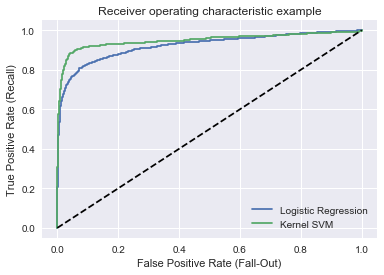

In [22]:
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()